In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv("Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
for i in df.columns:
    print(i,len(df[df[i] == 0]))

country 0
child_mort 0
exports 0
health 0
imports 0
income 0
inflation 0
life_expec 0
total_fer 0
gdpp 0


In [10]:
for i in df.columns:
    print(i,len(df[df[i] == "?"]))

country 0
child_mort 0
exports 0
health 0
imports 0
income 0
inflation 0
life_expec 0
total_fer 0
gdpp 0


## Corelation matrix

In [11]:
# Remove the 'country' column as it is not needed for correlation analysis
df = df.drop(columns=['country'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_matrix


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


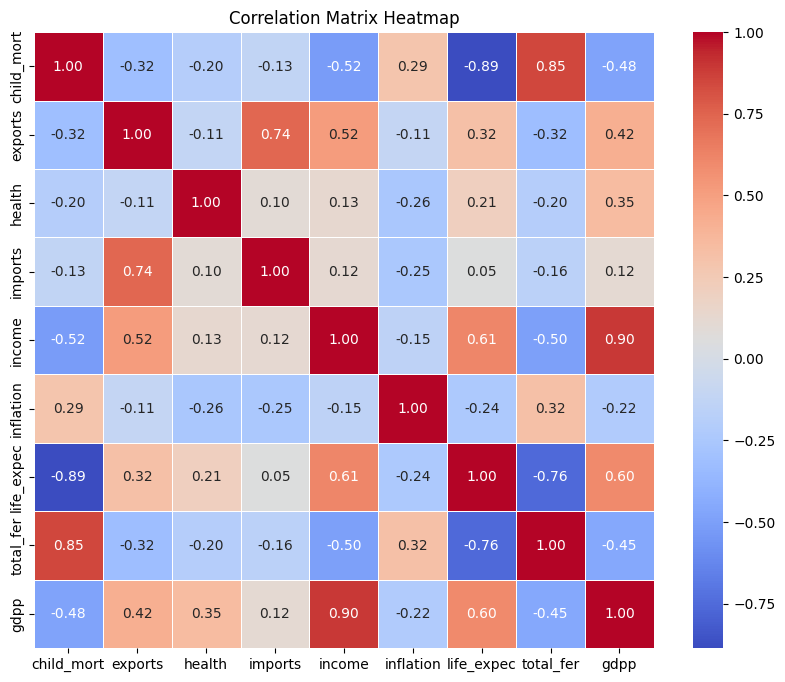

In [12]:

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


## Normalization

In [21]:
# Display summary statistics of the dataset
summary_statistics = df.describe()
summary_statistics


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Perform Min-Max normalization
normalized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
normalized_data.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## Elbow method

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

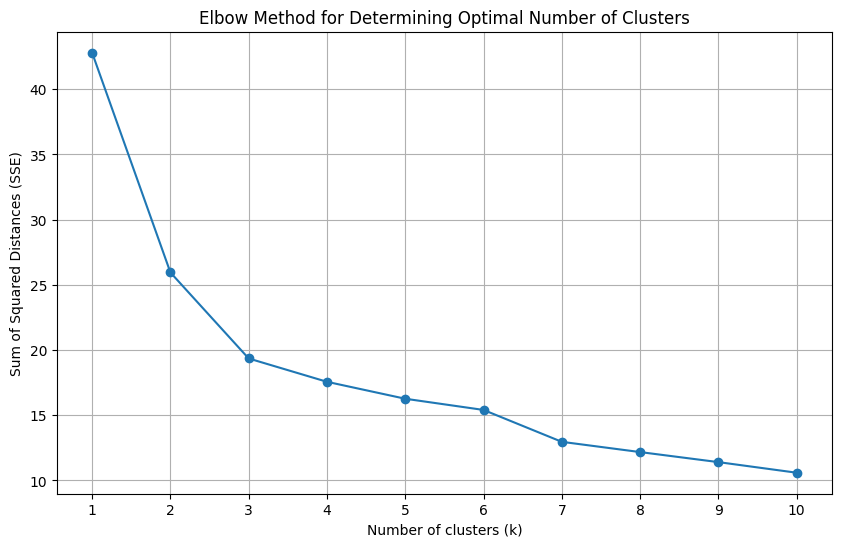

In [17]:
# Determine the optimal number of clusters using the Elbow method
# Range of k values to test
k_range = range(1, 11)

# List to store the sum of squared distances for each value of k
sse = []

# Calculate the sum of squared distances for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()


## Silhouette score

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

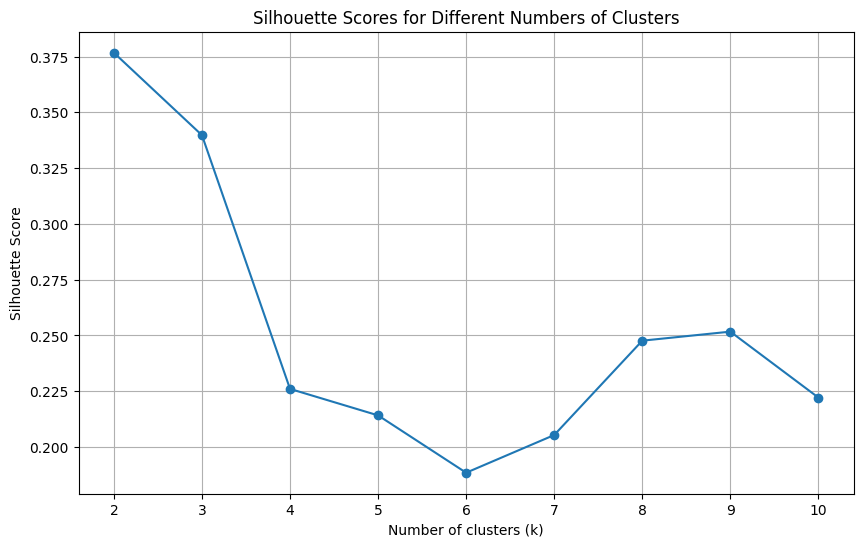

In [19]:
# Calculate silhouette scores for a range of cluster numbers
silhouette_scores = []

# Range of k values to test
k_range = range(2, 11)

# Calculate the silhouette score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    score = silhouette_score(normalized_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()


## K-meant with optimal K

In [20]:
# Execute K-Means with the optimal number of clusters (k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(normalized_data)

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the normalized data
normalized_data_with_clusters = normalized_data.copy()
normalized_data_with_clusters['Cluster'] = cluster_labels

normalized_data_with_clusters.head()


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


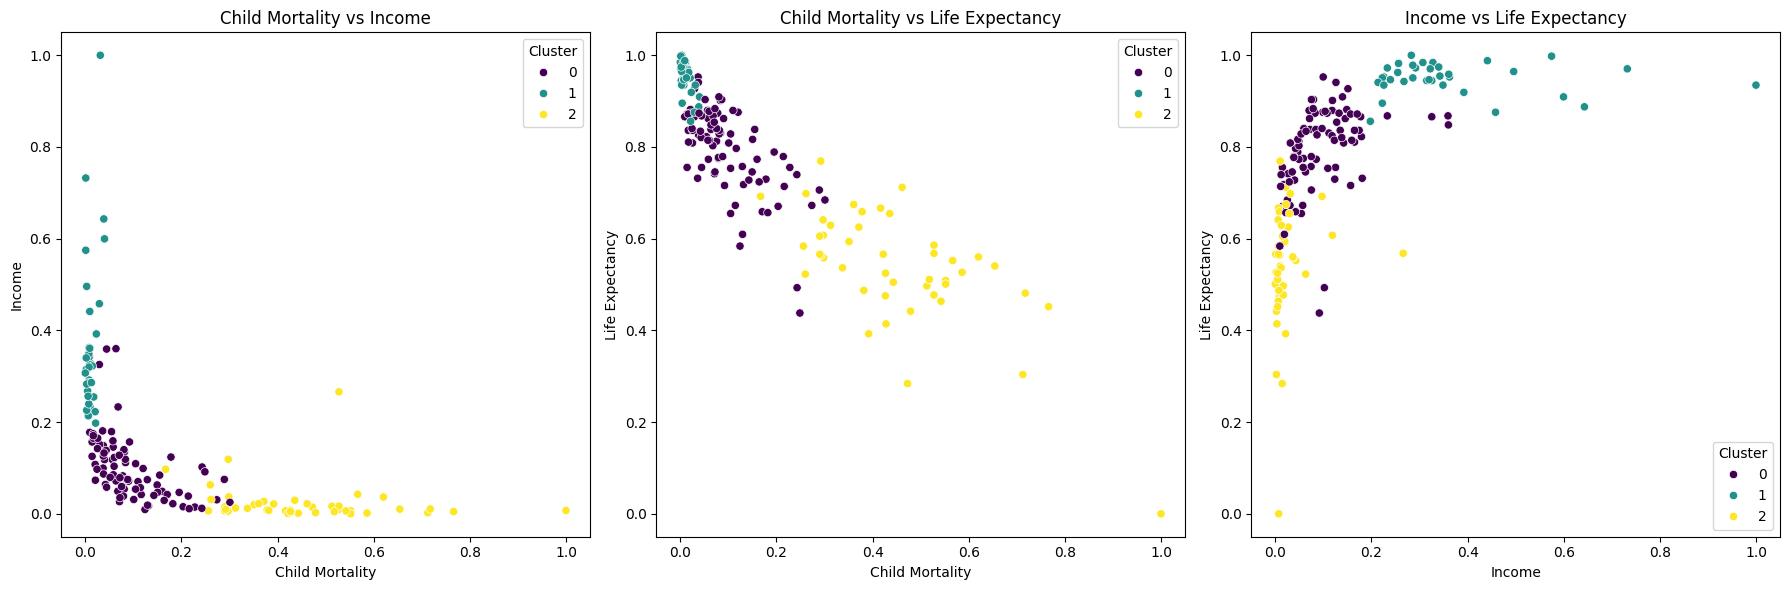

In [22]:
# Selecting three features for scatter plots: child_mort, income, and life_expec
features = ['child_mort', 'income', 'life_expec']

# Plotting scatter diagrams for each pair of selected features
plt.figure(figsize=(18, 6))

# Scatter plot for child_mort vs income
plt.subplot(1, 3, 1)
sns.scatterplot(x=normalized_data_with_clusters['child_mort'], y=normalized_data_with_clusters['income'], hue=normalized_data_with_clusters['Cluster'], palette='viridis')
plt.title('Child Mortality vs Income')
plt.xlabel('Child Mortality')
plt.ylabel('Income')

# Scatter plot for child_mort vs life_expec
plt.subplot(1, 3, 2)
sns.scatterplot(x=normalized_data_with_clusters['child_mort'], y=normalized_data_with_clusters['life_expec'], hue=normalized_data_with_clusters['Cluster'], palette='viridis')
plt.title('Child Mortality vs Life Expectancy')
plt.xlabel('Child Mortality')
plt.ylabel('Life Expectancy')

# Scatter plot for income vs life_expec
plt.subplot(1, 3, 3)
sns.scatterplot(x=normalized_data_with_clusters['income'], y=normalized_data_with_clusters['life_expec'], hue=normalized_data_with_clusters['Cluster'], palette='viridis')
plt.title('Income vs Life Expectancy')
plt.xlabel('Income')
plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()


## PCA

In [24]:
# Initialize PCA, reducing to 2 components for visualization
pca = PCA(n_components=2)

# Fit and transform the normalized data
pca_components = pca.fit_transform(normalized_data)

# Create a DataFrame with the PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

pca_df.head()


,PCA1,PCA2
0,-0.599078,0.095490
1,0.158474,-0.212092
2,0.003686,-0.135867
3,-0.650235,0.275975
4,0.200711,-0.064662


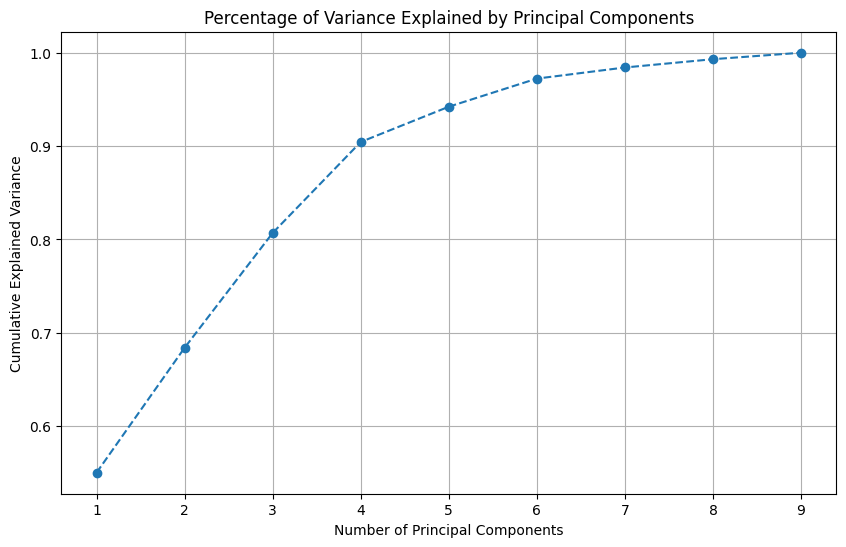

(array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
        0.03013659, 0.01190434, 0.00887791, 0.00694042]),
 array([0.55001227, 0.6838601 , 0.80687063, 0.9043611 , 0.94214073,
        0.97227732, 0.98418166, 0.99305958, 1.        ]))

In [25]:
# Calculate the explained variance ratio for each principal component
pca_full = PCA()
pca_full.fit(normalized_data)
explained_variance_ratio = pca_full.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the percentage of variance explained by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Percentage of Variance Explained by Principal Components')
plt.grid(True)
plt.show()

# Display explained variance ratios for reporting
explained_variance_ratio, cumulative_explained_variance


In [26]:
# Reduce the dataset dimensions based on the first four principal components
pca_reduced = PCA(n_components=4)
reduced_data = pca_reduced.fit_transform(normalized_data)

# Create a DataFrame with the reduced data
reduced_data_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

reduced_data_df.head()


,PCA1,PCA2,PCA3,PCA4
0,-0.599078,0.095490,0.157554,-0.024333
1,0.158474,-0.212092,-0.064189,-0.061247
2,0.003686,-0.135867,-0.134182,0.133574
3,-0.650235,0.275975,-0.142672,0.156018
4,0.200711,-0.064662,-0.100715,-0.037902


## Performing clustering with PCA data

### Elbow method

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

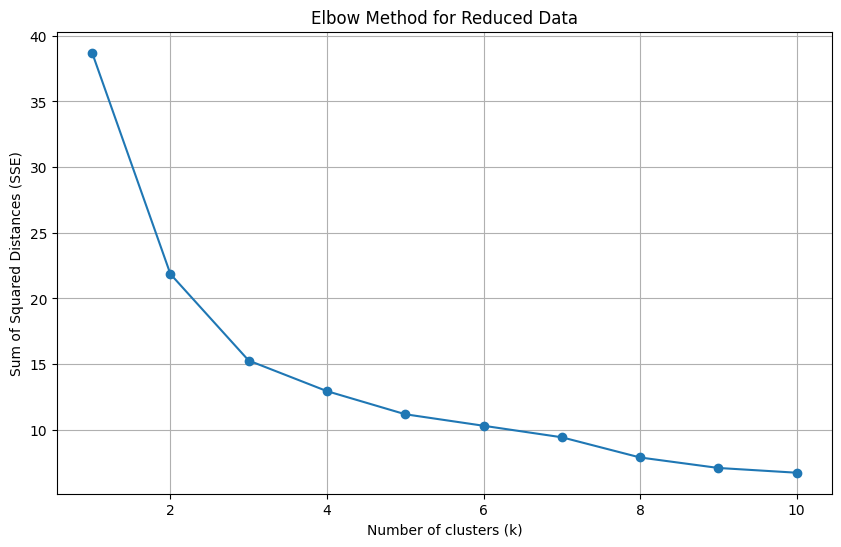

In [27]:
# Elbow method on reduced data
sse_reduced = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']])
    sse_reduced.append(kmeans.inertia_)

# Plot the Elbow graph for reduced data
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse_reduced, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Reduced Data')
plt.grid(True)
plt.show()



### Sillhouette method

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

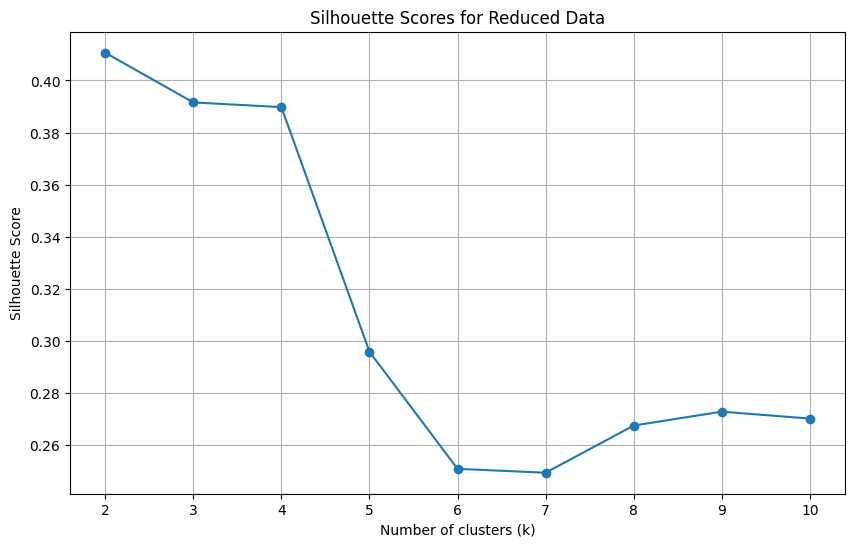

In [28]:
# Calculate silhouette scores for a range of cluster numbers on reduced data
silhouette_scores_reduced = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']])
    score = silhouette_score(reduced_data_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']], kmeans.labels_)
    silhouette_scores_reduced.append(score)

# Plot the silhouette scores for reduced data
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_reduced, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Reduced Data')
plt.grid(True)
plt.show()


### Determine the optimal number of clusters based on the Elbow method and silhouette scores


In [29]:
optimal_k_elbow_reduced = 3  # From previous analysis and visual inspection of the elbow plot
optimal_k_silhouette_reduced = silhouette_scores_reduced.index(max(silhouette_scores_reduced)) + 2  # Because the range starts at 2

optimal_k_elbow_reduced, optimal_k_silhouette_reduced

(3, 2)

### Execute the K-Means Algorithm

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


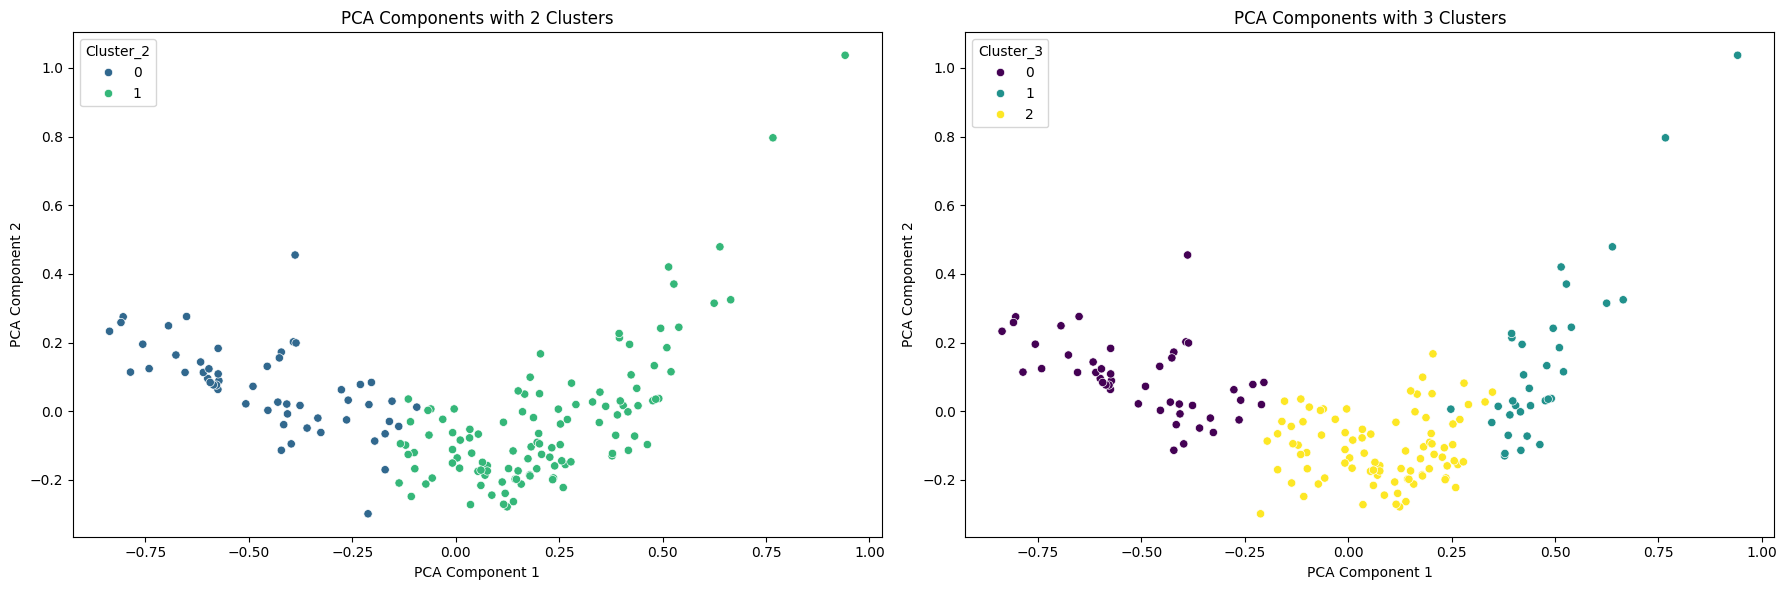

In [32]:
# Perform K-Means clustering with k=2
kmeans_2_clusters = KMeans(n_clusters=2, random_state=42)
kmeans_2_clusters.fit(reduced_data_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']])
reduced_data_df['Cluster_2'] = kmeans_2_clusters.labels_

# Perform K-Means clustering with k=3
kmeans_3_clusters = KMeans(n_clusters=3, random_state=42)
kmeans_3_clusters.fit(reduced_data_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']])
reduced_data_df['Cluster_3'] = kmeans_3_clusters.labels_

# Visualize the clustering results for k=2 and k=3 using the first two principal components
plt.figure(figsize=(18, 6))

# Scatter plot for k=2
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data_df['PCA1'], y=reduced_data_df['PCA2'], hue=reduced_data_df['Cluster_2'], palette='viridis')
plt.title('PCA Components with 2 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Scatter plot for k=3
plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data_df['PCA1'], y=reduced_data_df['PCA2'], hue=reduced_data_df['Cluster_3'], palette='viridis')
plt.title('PCA Components with 3 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

